In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing the solar plant inverter data
def load_data(file):
    return pd.read_csv('data/Solar PV Data/'+file)

In [3]:
# Inverter_data = load_data('Ground_PowerPlant_Narnaul_Inverter_ABB-PVS800.csv')

In [5]:
# print('Total attributes: ',Inverter_data.columns.shape[0])

In [71]:
# # Getting null values
# if 'Null' not in Inverter_data.isnull().sum(axis=0):
#     print('No null values..')
# else:
#     print(Inverter_data.isnull().sum(axis=0))

In [74]:
def export(file, name):
    file.to_csv('data/Solar PV Data/'+name,index=False )

__After observing the data, found that the rows had a lot of values with zeros, these rows are useless.__
Removing these rows would cause no problem, except some complications in dealing with time series.

Not removing them right now..

Instead replace them with the aggregate of the value above and below.
Run the code below only if their are some unusual datas in the dataset

In [72]:
# # converting timestamp to pandas datetime format
# Inverter_data['Timestamp'] = pd.to_datetime(Inverter_data['Timestamp'])
# New_Inverter_data = Inverter_data[~(Inverter_data == 0).any(axis=1)]
# New_Inverter_data.reset_index(inplace = True)
# New_Inverter_data.drop('index', axis=1, inplace=True)

# # Problem in PV current and PV power
# # Find values in PV power > 50000, and replace them by an aggragate of the values 
# # in the upper row and the lower row.
# faulty_columns = ['PV Voltage','PV Current (x1000)', 'PV Power']
# indices = []
# for col in faulty_columns:
#     temp = New_Inverter_data[(New_Inverter_data[col] > 60000)].index
#     for element in temp:
#         if element in indices:
#             continue
#         else:
#             indices.append(element)

# indices = indices[0: len(indices)-1]
# for index in indices:
#     prev_index, next_index = index-1, index+1
#     for col in faulty_columns:
#         if New_Inverter_data.iloc[index][col] > 50000:
#             prev = New_Inverter_data.iloc[index-1][col]
#             nex = New_Inverter_data.iloc[index+1][col]
#             New_Inverter_data.iloc[index][col] = ( prev + nex )/2    
            
# # New_Inverter_data.to_csv('data/Solar PV Data/New_inverter_data.csv',index=False )

In [96]:
# Now loading the latest preprocessed data
inverter_data = load_data('New_inverter_data.csv')
inverter_data['Timestamp'] = pd.to_datetime(inverter_data['Timestamp'])
inverter_data.head()

,Timestamp,Grid Current,Grid Power,Grid Frequency (x100),Grid Power Factor,Grid Reactive Power,PV Voltage,PV Current,PV Power,Inverter Temperature,Mode,Uptime (Hours),Electricity Generated,Counter kWh,Counter Mwh,Counter Gwh,Grid Breaker Counter,PV Breaker Counter
0,2017-12-18 08:30:01.344049,1080,7829,4992.0,100,65516,645,1226,800,73,4,8985,16501,612,650,1,1577,1533
1,2017-12-18 08:35:01.615264,1095,7566,4971.0,100,14,673,1183,787,75,4,8985,16502,672,650,1,1577,1533
2,2017-12-18 08:40:02.106861,1116,7774,4984.0,100,65531,667,1190,781,76,4,8985,16502,732,650,1,1577,1533
3,2017-12-18 08:50:03.851989,1083,7484,4978.0,100,21,647,1162,759,74,4,8985,16504,872,650,1,1577,1533
4,2017-12-18 09:05:14.000000,947,6616,4986.0,100,65532,658,1012,675,72,4,8985,16504,952,650,1,1578,1534


## Fixing the timezone problem

- till row 10194, time is in GMT.
- After that the time is in IST.

Option 1: Break the data frame into two parts and then later combine them

In [97]:
df1 = inverter_data[0:10193]
df1['Timestamp'] = df1['Timestamp'].dt.tz_localize('UTC')
time = df1['Timestamp'].dt.tz_convert('Asia/Kolkata')
df1['Timestamp'] = time

df2 = inverter_data[10193:]
df2['Timestamp'] = df2['Timestamp'].dt.tz_localize('Asia/Kolkata')
time = df2['Timestamp'].dt.tz_convert('Asia/Kolkata')
df2['Timestamp'] = time

inverter_data = df1.append(df2)

/home/somil/miniconda3/envs/solarpv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/somil/miniconda3/envs/solarpv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/somil/miniconda3/envs/solarpv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [113]:
# inverter_data.tail()
inverter_data = load_data('inverter_data_final.csv')
inverter_data['Timestamp'] = pd.to_datetime(inverter_data['Timestamp'])

In [130]:
# There is still some data with unusual hour values
# For now such values are neglected
inverter_data = inverter_data[inverter_data.Timestamp.dt.hour<19]
# export(inverter_data, 'inverter_data_final.csv')

In [150]:
#Sort the data according to datetime
inverter_data = inverter_data.sort_values(by='Timestamp')

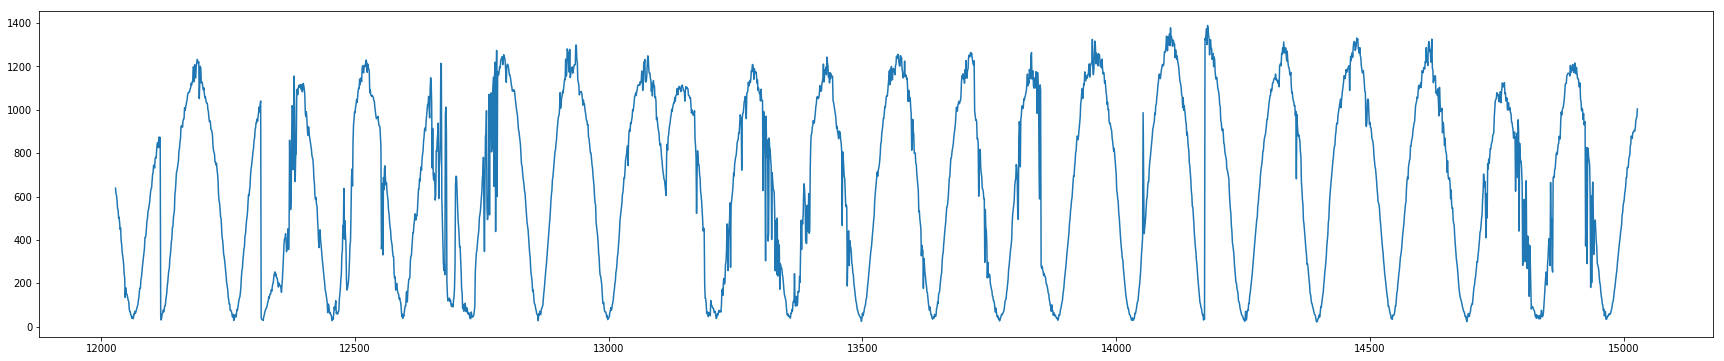

In [153]:
plt.figure(figsize=[30,6])
a = 12000
plt.plot(inverter_data['Grid Current'][a:a+3000])